# Identification of a Model

In [2]:
%matplotlib inline

import pylab
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from simcoon import simmit as sim
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
import os
from IPython.display import HTML
dir = os.path.dirname(os.path.realpath('__file__'))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In this Python Notebook we will show how to properly identify the material properties of a constitutive law (Chaboche) for cyclic plasticity

Such identification procedure require:
1. Proper experimental data
2. A proper numerical model (here a composite model for laminate constitutive model)
3. An identification strategy


The Chaboche elastic-plastic (isotropic with kinematical hardening) constitutive law implemented in simcoon is a rate independent, isotropic, von Mises type material with exponential law isotropic hardening and two non-linear kinematical hardening:
Ten parameters are required for the thermomechanical version: 

1. The Young modulus $E$,
2. The Poisson ratio $\nu$,
3. The coefficient of thermal expansion $\alpha$,
4. The von Mises equivalent yield stress limit $\sigma_{Y}$,
5. The activation hardening term $Q$,
6. The coefficient of isotropic hardening $b$,
7. The kinematical hardening coefficient $C_1$, 
8. The hardening accomodation parameter $D_1$
9. The kinematical hardening coefficient $C_2$, 
10. The hardening accomodation parameter $D_2$

The constitutive law is given by the set of equations 

$$\begin{matrix} {\sigma}_{ij}=L_{ijkl}\left({\varepsilon}^{\textrm{tot}}_{kl}-\alpha_{kl}\left(T-T^{\textrm{ref}}\right)-{\varepsilon}^{\textrm{p}}_{kl}\right),\\
\dot{\varepsilon}^{\textrm{p}}_{ij}=\dot{p}\Lambda_{ij}, \quad \Lambda_{ij}=\frac{3}{2}\frac{\sigma'_{ij}}{\lvert \mathbf{\sigma}\rvert}, \quad \sigma'_{ij}=\sigma_{ij}-\frac{1}{3}\sigma_{kk}\delta_{ij}, \quad \lvert q \rvert = \sqrt{\frac{3}{2}q'_{kl}q'_{kl}},\\ \Phi=\lvert \mathbf{\sigma}-\mathbf{X} \rvert -\sigma_{Y}-kp^m\leq 0, \quad \dot{p}\geq0,~~~ \dot{p}~\Phi=0, \end{matrix}$$

In [3]:
#Number_of_parameters
n_param = 7
#Number_of_consts
n_consts = 0
#Number_of_files
nfiles = 3

#Number_of_generations
ngen =  20
#Aleatory/Mesh space population : 0=mesh 1=meshlimit 2=random 3=defined
aleaspace = 2
#Space or aleatory population : apop in case of aleatory, spop in case of mesh
apop = 20
#Number of "doped" individual
ngboys = 1
#Max population per subgeneration
maxpop = 10
#Stationnary condition
#stationnary_cond = 10

path_data = dir + '/data'
path_keys = dir + '/keys'
path_results = dir + '/results'
outputfile = 'id_params.txt'
materialfile = 'material.dat'
simul_type = 'SOLVE'

sim.identification(simul_type,n_param,n_consts,nfiles,ngen,aleaspace,apop,ngboys,maxpop,path_data,path_keys,path_results,materialfile,outputfile)


/Users/ychemisky/Documents/Professionnel/Enseignement/2021-2022/4TCE802U/TP/identification_plasticity


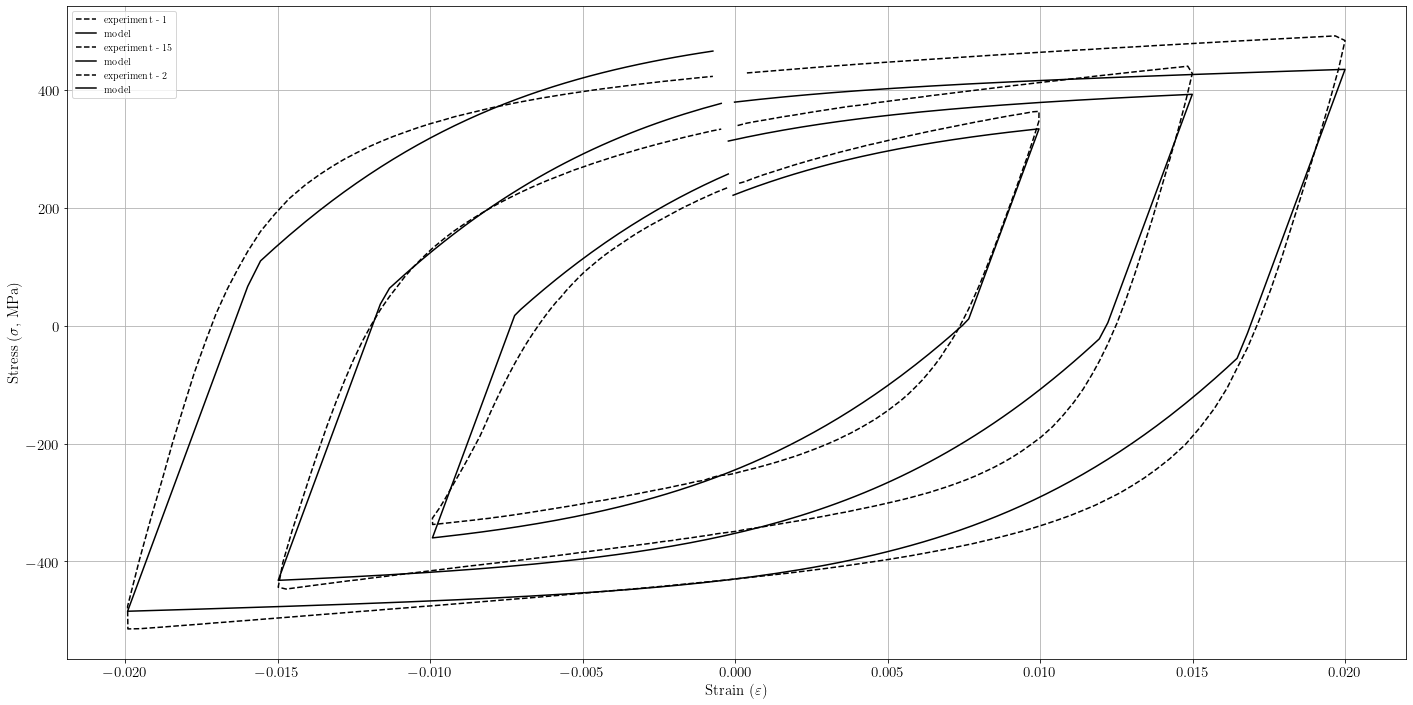

In [9]:
fig = plt.figure()
path = os.path.dirname(os.path.realpath('__file__')) + '/results/'
pylab.rcParams['figure.figsize'] = (24.0, 12.0) #configure the figure output size

pcs = ['1', '15', '2']
#valid = data_path + 'valid.txt'
e11num = []
s11num = []

for i in range(1,4):
    PL = path + 'simul_' + str(i) + '.txt'
    e11num_i, s11num_i = np.loadtxt(PL, usecols=(8,14), unpack=True)
    e11num.append(e11num_i)
    s11num.append(s11num_i)

path = os.path.dirname(os.path.realpath('__file__')) + '/exp_data/'

ax = plt.subplot(1,1,1)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel(r'Strain ($\varepsilon$)', size = 15)
plt.ylabel(r'Stress ($\sigma$, MPa)', size = 15)

for p in pcs:
    P_global = path + 'exp_file_' + p + '.txt'
    e11exp_i, s11exp_i = np.loadtxt(P_global, usecols=(2,3), unpack=True, skiprows=1)
    plt.plot(e11exp_i, s11exp_i, c='black', ls = '--', label = 'experiment - ' + p)
    plt.plot(e11num[pcs.index(p)], s11num[pcs.index(p)], c='black', label = 'model')

#plt.xlim(330,350)
#plt.ylim(0.09,0.095)
plt.legend(loc=2)

path = os.path.dirname(os.path.realpath('__file__')) + '/results/'
file = 'Figure_results.pdf'
pp = path + file
plt.savefig(pp, format='pdf')
plt.show()